In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import glob
import calendar
import pickle
import os
import matplotlib.image as mpimg
import json
from scipy.integrate import odeint
from matplotlib import ticker
from tqdm import tqdm_notebook as tqdm
from scipy import interpolate
from scipy.interpolate import interp1d
from scipy.stats import circmean,circstd
from scipy.optimize import curve_fit
from scipy.stats import zscore
from sympy import *
import matplotlib.image as mpimg

def_color=plt.rcParams['axes.prop_cycle'].by_key()['color']
font = {'size'   : 15}
month_names   = [x[:3] for x in calendar.month_name[1:13]]
month_names0  = np.roll(month_names,1)

def daylen(phi,delta=23.44*np.pi/180):#23.44 degrees is earth tilt
    '''Computes fractional change in daylength as function of latitude'''
    return (2*(180/np.pi*np.arccos(np.tan(delta)*np.tan(phi*np.pi/180)))/15)

In [4]:
[pituitary_list,effector_list] = pickle.load(open('seasonality_processed_data1102_20_80.pickle','rb'))[0:2]
effector_hormone_dic={'CORTISOL_BLOOD':'Cortisol',
                     'CORTISOL_U_FREE_24h':'Urinary cortisol',
                     'T3_FREE':'T3-free',
                     'T4_FREE':'T4-free',
                     'ESTRADIOL_E_2':'Estradiol',
                     'TESTOSTERONE_TOTAL':'Testosterone',
                     'INSULIN_LIKE_GROWTH_FACTOR_1':'IGF1'}

pituitary_hormone_dic={'ACTH_ADRENOCORTICOTROPIC_HORMONE':'ACTH',
                    'TSH_THYROID_STIMULATING_HORMONE':'TSH',
                    'LH_LUTEINIZING_HORMONE':'LH',
                    'FSH_FOLLICLE_STIMULATING_HORMONE':'FSH',
                    'GROWTH_HORMONE_GH':'GH',
                    'PROLACTIN':'Prolactin'}

def HPA_phase_axspan(ax2,ax3):
    eff_acrophase     = [effector_list[effector_hormone_dic['CORTISOL_BLOOD']][sex]['Cosinor']['pars'][0][2] for sex in ['male','female']]
    eff_acrophase_std = [effector_list[effector_hormone_dic['CORTISOL_BLOOD']][sex]['Cosinor']['pars'][1][2] for sex in ['male','female']]
    ax3.axvspan(eff_acrophase[0]-eff_acrophase_std[0], eff_acrophase[0]+eff_acrophase_std[0],color='lightgreen',ec='lightgreen',lw=2, alpha=0.5)
    ax3.axvspan(eff_acrophase[1]-eff_acrophase_std[1], eff_acrophase[1]+eff_acrophase_std[1],color='darkgreen',ec='darkgreen',lw=2, alpha=0.5)

def HPT_phase_axspan(ax2,ax3):
    eff_acrophase     = [effector_list[effector_hormone_dic['T4_FREE']][sex]['Cosinor']['pars'][0][2] for sex in ['male','female']]
    eff_acrophase_std = [effector_list[effector_hormone_dic['T4_FREE']][sex]['Cosinor']['pars'][1][2] for sex in ['male','female']]
    ax3.axvspan(eff_acrophase[0]-eff_acrophase_std[0], eff_acrophase[0]+eff_acrophase_std[0],color='lightgreen',ec='lightgreen',lw=2, alpha=0.5)
    ax3.axvspan(eff_acrophase[1]-eff_acrophase_std[1], eff_acrophase[1]+eff_acrophase_std[1],color='darkgreen',ec='darkgreen',lw=2, alpha=0.5)

    eff_acrophase     = [effector_list[effector_hormone_dic['T3_FREE']][sex]['Cosinor']['pars'][0][2] for sex in ['male','female']]
    eff_acrophase_std = [effector_list[effector_hormone_dic['T3_FREE']][sex]['Cosinor']['pars'][1][2] for sex in ['male','female']]
    ax3.axvspan(eff_acrophase[0]-eff_acrophase_std[0], eff_acrophase[0]+eff_acrophase_std[0],color='lightgreen',ec='lightgreen',ls='--',lw=2, alpha=0.5)
    ax3.axvspan(eff_acrophase[1]-eff_acrophase_std[1], eff_acrophase[1]+eff_acrophase_std[1],color='darkgreen',ec='darkgreen',ls='--',lw=2, alpha=0.5)

    pit_acrophase     = [pituitary_list[pituitary_hormone_dic['TSH_THYROID_STIMULATING_HORMONE']][sex]['Cosinor']['pars'][0][2] for sex in ['male','female']]
    pit_acrophase_std = [pituitary_list[pituitary_hormone_dic['TSH_THYROID_STIMULATING_HORMONE']][sex]['Cosinor']['pars'][1][2] for sex in ['male','female']]
    ax2.axvspan(pit_acrophase[0]-pit_acrophase_std[0], pit_acrophase[0]+pit_acrophase_std[0],color='lightgreen',ec='lightgreen',lw=2, alpha=0.5)
    ax2.axvspan(pit_acrophase[1]-pit_acrophase_std[1], pit_acrophase[1]+pit_acrophase_std[1],color='darkgreen',ec='darkgreen',lw=2, alpha=0.5)
    
def HPgrowth_phase_axspan(ax2,ax3):
    eff_acrophase     = [effector_list[effector_hormone_dic['INSULIN_LIKE_GROWTH_FACTOR_1']][sex]['Cosinor']['pars'][0][2] for sex in ['male','female']]
    eff_acrophase_std = [effector_list[effector_hormone_dic['INSULIN_LIKE_GROWTH_FACTOR_1']][sex]['Cosinor']['pars'][1][2] for sex in ['male','female']]
    ax3.axvspan(eff_acrophase[0]-eff_acrophase_std[0], eff_acrophase[0]+eff_acrophase_std[0],color='lightgreen',ec='lightgreen',lw=2, alpha=0.5)
    ax3.axvspan(eff_acrophase[1]-eff_acrophase_std[1], eff_acrophase[1]+eff_acrophase_std[1],color='darkgreen',ec='darkgreen',lw=2, alpha=0.5)

    pit_acrophase     = [pituitary_list[pituitary_hormone_dic['GROWTH_HORMONE_GH']][sex]['Cosinor']['pars'][0][2] for sex in ['male','female']]
    pit_acrophase_std = [pituitary_list[pituitary_hormone_dic['GROWTH_HORMONE_GH']][sex]['Cosinor']['pars'][1][2] for sex in ['male','female']]
    ax2.axvspan(pit_acrophase[0]-pit_acrophase_std[0], pit_acrophase[0]+pit_acrophase_std[0],color='lightgreen',ec='lightgreen',lw=2, alpha=0.5)
    ax2.axvspan(pit_acrophase[1]-pit_acrophase_std[1], pit_acrophase[1]+pit_acrophase_std[1],color='darkgreen',ec='darkgreen',lw=2, alpha=0.5)
    
def HPL_phase_axspan(ax2,ax3):
    pit_acrophase     = [pituitary_list[pituitary_hormone_dic['PROLACTIN']][sex]['Cosinor']['pars'][0][2] for sex in ['male','female']]
    pit_acrophase_std = [pituitary_list[pituitary_hormone_dic['PROLACTIN']][sex]['Cosinor']['pars'][1][2] for sex in ['male','female']]
    ax2.axvspan(pit_acrophase[0]-pit_acrophase_std[0], pit_acrophase[0]+pit_acrophase_std[0],color='lightgreen',ec='lightgreen',lw=2, alpha=0.5)
    ax2.axvspan(pit_acrophase[1]-pit_acrophase_std[1], pit_acrophase[1]+pit_acrophase_std[1],color='darkgreen',ec='darkgreen',lw=2, alpha=0.5)
    
def HPG_phase_axspan(ax2,ax3):
    eff_acrophase     = [effector_list[effector_hormone_dic['TESTOSTERONE_TOTAL']][sex]['Cosinor']['pars'][0][2] for sex in ['male','female']]
    eff_acrophase_std = [effector_list[effector_hormone_dic['TESTOSTERONE_TOTAL']][sex]['Cosinor']['pars'][1][2] for sex in ['male','female']]
    ax3.axvspan(eff_acrophase[0]-eff_acrophase_std[0], eff_acrophase[0]+eff_acrophase_std[0],color='lightgreen',ec='lightgreen',lw=2, alpha=0.5)
    
    eff_acrophase     = [effector_list[effector_hormone_dic['ESTRADIOL_E_2']][sex]['Cosinor']['pars'][0][2] for sex in ['male','female']]
    eff_acrophase_std = [effector_list[effector_hormone_dic['ESTRADIOL_E_2']][sex]['Cosinor']['pars'][1][2] for sex in ['male','female']]
    ax3.axvspan(eff_acrophase[1]-eff_acrophase_std[1], eff_acrophase[1]+eff_acrophase_std[1],color='darkgreen',ec='darkgreen',lw=2, alpha=0.5)

    pit_acrophase     = [pituitary_list[pituitary_hormone_dic['LH_LUTEINIZING_HORMONE']][sex]['Cosinor']['pars'][0][2] for sex in ['male','female']]
    pit_acrophase_std = [pituitary_list[pituitary_hormone_dic['LH_LUTEINIZING_HORMONE']][sex]['Cosinor']['pars'][1][2] for sex in ['male','female']]
    ax2.axvspan(pit_acrophase[0]-pit_acrophase_std[0], pit_acrophase[0]+pit_acrophase_std[0],color='lightgreen',ec='lightgreen',lw=2, alpha=0.5)
    ax2.axvspan(pit_acrophase[1]-pit_acrophase_std[1], pit_acrophase[1]+pit_acrophase_std[1],color='darkgreen',ec='darkgreen',lw=2, alpha=0.5)
    

In [5]:
def theory_3_subplot(time, day_length, data1, data2, label1, label2, color1, color2,title):
    '''
    This function is used to plot effector and pituitary hormone together on a graph with two y-axes
    '''
    fig = plt.figure(figsize=(5,4))
    ax1 = plt.subplot(3,1,1)
    ax2 = plt.subplot(3,1,2)
    ax3 = plt.subplot(3,1,3)
    axes= [ax1,ax2,ax3]
    
    ln1=ax1.plot(time,day_length,color=def_color[7],linewidth=3.0)
    ln2=ax2.plot(time,data1,linestyle='-',color=color1,linewidth=3.0)
    ln3=ax3.plot(time,data2,linestyle='-',color=color2,linewidth=3.0)
    
    ax1.tick_params(axis='y')
    ax1.set_ylabel('input u',fontsize=15,fontweight='bold')
    ax2.set_ylabel(label1,fontsize=15,fontweight='bold',color=color1)
    ax3.set_ylabel(label2,fontsize=15,fontweight='bold',color=color2)
    
    ax1.set_xlim([0,12])
    ax2.set_xlim([0,12])
    ax3.set_xlim([0,12])

    ax1.xaxis.set_visible(False)    
    ax2.xaxis.set_visible(False)    
    
    ax1.tick_params(axis='y',labelsize =15)
    ax1.set_yticks([]) 
    ax2.set_yticks([]) 
    ax3.set_yticks([]) 
    ax3.tick_params(axis='x',labelsize =15)
    
    ax1.axvline(x=0.7,ls='--',c='k'); ax1.axvline(x=6.7,ls='--',c='k')
    ax2.axvline(x=0.7,ls='--',c='k'); ax2.axvline(x=6.7,ls='--',c='k')
    ax3.axvline(x=0.7,ls='--',c='k'); ax3.axvline(x=6.7,ls='--',c='k')
    ax3.set_xticks(np.arange(0,13,1))
    ax3.set_xticklabels([])
    ax3.set_xticks(np.arange(0,12,1)+0.5,minor=True)
    ax3.set_xticklabels(month_names0[::1], rotation=45,fontsize=12,fontweight='bold',minor =True)

    ax1.set_title(title,fontsize=15,fontweight='bold')
    plt.show()
    
def theory_3_subplot_big(axes,time, day_length, data1, data2, label1, label2, color1, color2,title):
    '''
    This function is used to plot effector and pituitary hormone together on a graph with two y-axes
    '''
    ln1=ax1.plot(time,day_length,color=def_color[7],linewidth=3.0)
    ln2=ax2.plot(time,data1,linestyle='-',color=color1,linewidth=3.0)
    ln3=ax3.plot(time,data2,linestyle='-',color=color2,linewidth=3.0)
    
    ax1.tick_params(axis='y')
    ax1.set_ylabel('input u',fontsize=10,fontweight='bold')
    ax2.set_ylabel(label1,fontsize=10,fontweight='bold',color=color1)
    ax3.set_ylabel(label2,fontsize=10,fontweight='bold',color=color2)
    
    ax1.set_xlim([0,12])
    ax2.set_xlim([0,12])
    ax3.set_xlim([0,12])

    ax1.xaxis.set_visible(False)    
    ax2.xaxis.set_visible(False)    
    
    ax1.tick_params(axis='y',labelsize =10)
    ax1.set_yticks([]) 
    ax2.set_yticks([]) 
    ax3.set_yticks([]) 
    ax3.tick_params(axis='x',labelsize =10)
    
    ax1.axvline(x=0.7,ls='--',c='k'); ax1.axvline(x=6.7,ls='--',c='k')
    ax2.axvline(x=0.7,ls='--',c='k'); ax2.axvline(x=6.7,ls='--',c='k')
    ax3.axvline(x=0.7,ls='--',c='k'); ax3.axvline(x=6.7,ls='--',c='k')
    ax3.set_xticks(np.arange(0,13,1))
    ax3.set_xticklabels([])
    ax3.set_xticks(np.arange(0,12,1)+0.5,minor=True)
    ax3.set_xticklabels(month_names0[::1], rotation=45,fontsize=10,fontweight='bold',minor =True)

    if label1 == 'PRL':
        ax3.remove()

    ax1.set_title(title,fontsize=12,fontweight='bold')

# Simulated equations

log(2)/30


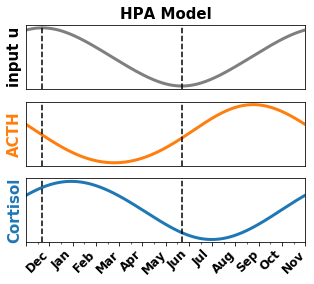

1/29


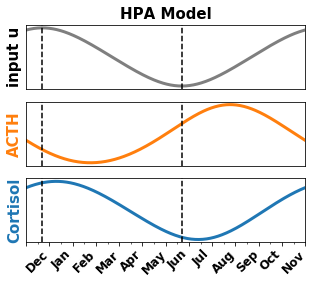

log(2)/35, log(2)/15


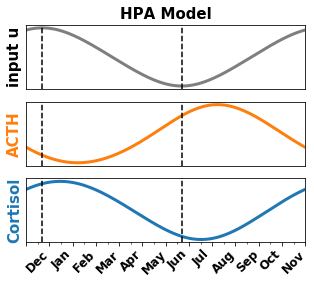

1/27, 1/17 


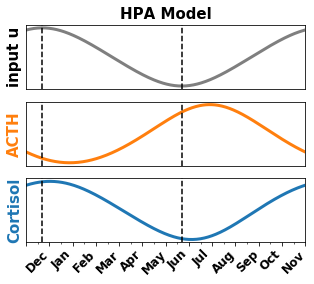

In [6]:
'''
HPA Model log(2)/30
'''
print('log(2)/30')
############### equations ####################
def HPA_fast(y,uapkr):
    ## timescale of minutes
    a1=1/(7); a2=1/(30); a3=1/(60*1.5); b1=a1   ; b2=a2    ; b3=a3  
    u,A,P,k,R  = uapkr
    [x1,x2,x3] = y 
    dy         = np.empty(3)
    dy[0] = u*b1/(x3*(1+(x3/k)**3))-a1*x1
    dy[1] = b2*x1*P/(1+(x3/k)**3)  -a2*x2
    dy[2] = b3*x2*A                -a3*x3
    return dy

def GetNumericSS_HPA(U,A,P,K,R):
    t      = np.linspace(0,60*24,100)
    sol    = odeint(lambda y,t:HPA_fast(y,[U,A,P,K,R]),[1,1,1],t)
    res    = sol[-1,:]
    return res

slow_rate = np.log(2)/30; K0 = 4
###############################################
sim_time  = np.linspace(-21,4*365-1-21,4*365)
adrenal   = np.zeros_like(sim_time); adrenal[0]  = 1
pituitary = np.zeros_like(sim_time); pituitary[0]= 1
K0 = 4; aP = slow_rate; aA = slow_rate; bP = slow_rate; bA = slow_rate

for i,t in enumerate(sim_time[:-1]):
    A = adrenal[i]; 
    P = pituitary[i]
    u = 2 - daylen(31.77,delta=23.44*np.cos(2*np.pi*((t)/365))*np.pi/180)/12
    
    x1,x2,x3  = GetNumericSS_HPA(u,A,P,K0,1)
    dA = A*(bA*x2-aA); adrenal[i+1]   = A + dA
    dP = P*(bP*x1-aP); pituitary[i+1] = P + dP ## x1 activate P
    
# seperate the fast and slow time scale, simulating again for the last year   
res = np.array([GetNumericSS_HPA(1,A,P,K0,1) for A,P in zip(adrenal[-365:],pituitary[-365:])]); 
res = res/np.mean(res,axis=0);
theory_3_subplot(np.arange(365)/365*12,[2 - daylen(31.77,delta=23.44*np.cos(2*np.pi*((t)/365))*np.pi/180)/12 for t in sim_time[-365:]],
                 res[:,1],res[:,2],'ACTH','Cortisol',def_color[1],def_color[0],'HPA Model')
plt.show()
'''
HPA Model 1/29
'''
print('1/29')
############### equations ####################
def HPA_fast(y,uapkr):
    ## timescale of minutes
    a1=1/(7); a2=1/(30); a3=1/(60*1.5); b1=a1   ; b2=a2    ; b3=a3  
    u,A,P,k,R  = uapkr
    [x1,x2,x3] = y 
    dy         = np.empty(3)
    dy[0] = u*b1/(x3*(1+(x3/k)**3))-a1*x1
    dy[1] = b2*x1*P/(1+(x3/k)**3)  -a2*x2
    dy[2] = b3*x2*A                -a3*x3
    return dy

def GetNumericSS_HPA(U,A,P,K,R):
    t      = np.linspace(0,60*24,100)
    sol    = odeint(lambda y,t:HPA_fast(y,[U,A,P,K,R]),[1,1,1],t)
    res    = sol[-1,:]
    return res

slow_rate = 1/29; K0 = 4
###############################################
sim_time  = np.linspace(-21,4*365-1-21,4*365)
adrenal   = np.zeros_like(sim_time); adrenal[0]  = 1
pituitary = np.zeros_like(sim_time); pituitary[0]= 1
K0 = 4; aP = slow_rate; aA = slow_rate; bP = slow_rate; bA = slow_rate

for i,t in enumerate(sim_time[:-1]):
    A = adrenal[i]; 
    P = pituitary[i]
    u = 2 - daylen(31.77,delta=23.44*np.cos(2*np.pi*((t)/365))*np.pi/180)/12
    
    x1,x2,x3  = GetNumericSS_HPA(u,A,P,K0,1)
    dA = A*(bA*x2-aA); adrenal[i+1]   = A + dA
    dP = P*(bP*x1-aP); pituitary[i+1] = P + dP ## x1 activate P
    
# seperate the fast and slow time scale, simulating again for the last year   
res = np.array([GetNumericSS_HPA(1,A,P,K0,1) for A,P in zip(adrenal[-365:],pituitary[-365:])]); 
res = res/np.mean(res,axis=0);
theory_3_subplot(np.arange(365)/365*12,[2 - daylen(31.77,delta=23.44*np.cos(2*np.pi*((t)/365))*np.pi/180)/12 for t in sim_time[-365:]],
                 res[:,1],res[:,2],'ACTH','Cortisol',def_color[1],def_color[0],'HPA Model')

plt.show()
'''
HPA Model parameterscan halflives
'''
print('log(2)/35, log(2)/15')

############### equations ####################
def HPA_fast(y,uapkr):
    ## timescale of minutes
    a1=1/(7); a2=1/(30); a3=1/(60*1.5); b1=a1   ; b2=a2    ; b3=a3  
    u,A,P,k,R  = uapkr
    [x1,x2,x3] = y 
    dy         = np.empty(3)
    dy[0] = u*b1/(x3*(1+(x3/k)**3))-a1*x1
    dy[1] = b2*x1*P/(1+(x3/k)**3)  -a2*x2
    dy[2] = b3*x2*A                -a3*x3
    return dy

def GetNumericSS_HPA(U,A,P,K,R):
    t      = np.linspace(0,60*24,100)
    sol    = odeint(lambda y,t:HPA_fast(y,[U,A,P,K,R]),[1,1,1],t)
    res    = sol[-1,:]
    return res

###############################################
sim_time  = np.linspace(-21,4*365-1-21,4*365)
adrenal   = np.zeros_like(sim_time); adrenal[0]  = 1
pituitary = np.zeros_like(sim_time); pituitary[0]= 1
K0 = 4; aP = np.log(2)/35; aA = np.log(2)/15; bP = np.log(2)/35; bA = np.log(2)/15

for i,t in enumerate(sim_time[:-1]):
    A = adrenal[i]; 
    P = pituitary[i]
    u = 2 - daylen(31.77,delta=23.44*np.cos(2*np.pi*((t)/365))*np.pi/180)/12
    
    x1,x2,x3  = GetNumericSS_HPA(u,A,P,K0,1)
    dA = A*(bA*x2-aA); adrenal[i+1]   = A + dA
    dP = P*(bP*x1-aP); pituitary[i+1] = P + dP ## x1 activate P
    
# seperate the fast and slow time scale, simulating again for the last year   
res = np.array([GetNumericSS_HPA(1,A,P,K0,1) for A,P in zip(adrenal[-365:],pituitary[-365:])]); 
res = res/np.mean(res,axis=0);
theory_3_subplot(np.arange(365)/365*12,[2 - daylen(31.77,delta=23.44*np.cos(2*np.pi*((t)/365))*np.pi/180)/12 for t in sim_time[-365:]],
                 res[:,1],res[:,2],'ACTH','Cortisol',def_color[1],def_color[0],'HPA Model') 
plt.show()

'''
HPA Model estimated parameters, SI
'''
print('1/27, 1/17 ')

############### equations ####################
def HPA_fast(y,uapkr):
    ## timescale of minutes
    a1=1/(7); a2=1/(30); a3=1/(60*1.5); b1=a1   ; b2=a2    ; b3=a3  
    u,A,P,k,R  = uapkr
    [x1,x2,x3] = y 
    dy         = np.empty(3)
    dy[0] = u*b1/(x3*(1+(x3/k)**3))-a1*x1
    dy[1] = b2*x1*P/(1+(x3/k)**3)  -a2*x2
    dy[2] = b3*x2*A                -a3*x3
    return dy

def GetNumericSS_HPA(U,A,P,K,R):
    t      = np.linspace(0,60*24,100)
    sol    = odeint(lambda y,t:HPA_fast(y,[U,A,P,K,R]),[1,1,1],t)
    res    = sol[-1,:]
    return res

###############################################
sim_time  = np.linspace(-21,4*365-1-21,4*365)
adrenal   = np.zeros_like(sim_time); adrenal[0]  = 1
pituitary = np.zeros_like(sim_time); pituitary[0]= 1
K0 = 4; aP = 1/27; aA = 1/17; bP = 1/27; bA = 1/17

for i,t in enumerate(sim_time[:-1]):
    A = adrenal[i]; 
    P = pituitary[i]
    u = 2 - daylen(31.77,delta=23.44*np.cos(2*np.pi*((t)/365))*np.pi/180)/12
    
    x1,x2,x3  = GetNumericSS_HPA(u,A,P,K0,1)
    dA = A*(bA*x2-aA); adrenal[i+1]   = A + dA
    dP = P*(bP*x1-aP); pituitary[i+1] = P + dP ## x1 activate P
    
# seperate the fast and slow time scale, simulating again for the last year   
res = np.array([GetNumericSS_HPA(1,A,P,K0,1) for A,P in zip(adrenal[-365:],pituitary[-365:])]); 
res = res/np.mean(res,axis=0);
theory_3_subplot(np.arange(365)/365*12,[2 - daylen(31.77,delta=23.44*np.cos(2*np.pi*((t)/365))*np.pi/180)/12 for t in sim_time[-365:]],
                 res[:,1],res[:,2],'ACTH','Cortisol',def_color[1],def_color[0],'HPA Model')

Text(0, 0.5, 'T3')

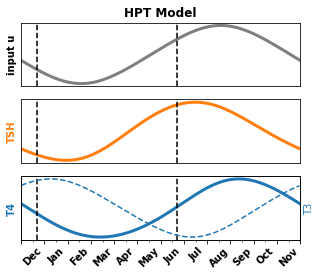

In [5]:
'''
HPT Model
'''
def HPT_fast(y,uapkr):
    ## timescale of minutes
    a1=1/(7); a2=1/(60); a3=1/(60*24*7); b1=a1   ; b2=a2    ; b3=a3  
    u,A,P,k,R  = uapkr
    [x1,x2,x3] = y 
    dy         = np.empty(3)
    dy[0] = u*b1/x3     -a1*x1
    dy[1] = b2*x1*P/x3  -a2*x2
    dy[2] = b3*x2*A     -a3*x3
    return dy

def GetNumericSS_HPT(U,A,P,K,R):
    t      = np.linspace(0,60*24,100)
    sol    = odeint(lambda y,t:HPT_fast(y,[U,A,P,K,R]),[1,1,1],t)
    res    = sol[-1,:]
    return res
hormones = []
slow_rate = np.log(2)/30;
sim_time  = np.linspace(-21,4*365-1-21,4*365)
thyroid   = np.zeros_like(sim_time); thyroid[0]  = 1
pituitary = np.zeros_like(sim_time); pituitary[0]= 1
aP = slow_rate; aT = slow_rate; bP = slow_rate; bT = slow_rate
t3       = []
for i,t in enumerate(sim_time[:-1]):
    T = thyroid[i]; 
    P = pituitary[i]
    u = 2 - daylen(31.77,delta=23.44*np.cos(2*np.pi*((t-8*30)/365))*np.pi/180)/12
    ui= 2 - daylen(31.77,delta=23.44*np.cos(2*np.pi*((t-7*30)/365)+np.pi)*np.pi/180)/12

    x1,x2,x3  = GetNumericSS_HPT(u,T,P,1,1)
    dT = T*(bT*x2-aT); thyroid[i+1]   = T + dT
    dP = P*(bP/x3-aP); pituitary[i+1] = P + dP ## x1 activate P
    t3.append([x3*ui])
    hormones.append([x1,x2,x3])
    
res = np.array(hormones[-365:]); 
res = res/np.mean(res,axis=0);

fig = plt.figure(figsize=(5,4))
ax1 = plt.subplot(3,1,1)
ax2 = plt.subplot(3,1,2)
ax3 = plt.subplot(3,1,3)
axes= [ax1,ax2,ax3]

theory_3_subplot_big(axes,np.arange(365)/365*12,[2 - daylen(31.77,delta=23.44*np.cos(2*np.pi*((t-8*30)/365))*np.pi/180)/12 for t in sim_time[-365:]],
                 res[:,1],res[:,2],'TSH','T4',def_color[1],def_color[0],'HPT Model') 

ax3b = ax3.twinx()
ax3b.plot(np.arange(365)/365*12,np.array(t3/np.mean(t3[-365:]))[-365:],'--',c=def_color[0])
ax3b.set_yticks([])
ax3b.set_ylabel('T3',c = def_color[0])

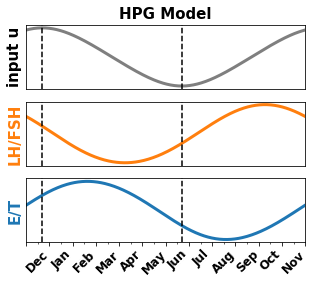

In [6]:
'''
HPG Model
'''
############### equations ####################
def HPA_fast(y,uapkr):
    ## timescale of minutes
    a1=1/(7); a2=1/(30); a3=1/(60*1.5); b1=a1   ; b2=a2    ; b3=a3  
    u,A,P,k,R  = uapkr
    [x1,x2,x3] = y 
    dy         = np.empty(3)
    dy[0] = u*b1/x3    -a1*x1
    dy[1] = b2*x1*P/x3 -a2*x2
    dy[2] = b3*x2*A    -a3*x3
    return dy

def GetNumericSS_HPA(U,A,P,K,R):
    t      = np.linspace(0,60*24,100)
    sol    = odeint(lambda y,t:HPA_fast(y,[U,A,P,K,R]),[1,1,1],t)
    res    = sol[-1,:]
    return res

slow_rate = np.log(2)/30; K0 = 4
###############################################
sim_time  = np.linspace(-21,4*365-1-21,4*365)
adrenal   = np.zeros_like(sim_time); adrenal[0]  = 1
pituitary = np.zeros_like(sim_time); pituitary[0]= 1
K0 = 4; aP = slow_rate; aA = slow_rate; bP = slow_rate; bA = slow_rate

for i,t in enumerate(sim_time[:-1]):
    A = adrenal[i]; 
    P = pituitary[i]
    u = 2 - daylen(31.77,delta=23.44*np.cos(2*np.pi*((t)/365))*np.pi/180)/12
    
    x1,x2,x3  = GetNumericSS_HPA(u,A,P,K0,1)
    dA = A*(bA*x2-aA); adrenal[i+1]   = A + dA
    dP = P*(bP*x1-aP); pituitary[i+1] = P + dP ## x1 activate P
    
# seperate the fast and slow time scale, simulating again for the last year   
res = np.array([GetNumericSS_HPA(1,A,P,K0,1) for A,P in zip(adrenal[-365:],pituitary[-365:])]); 
res = res/np.mean(res,axis=0);
theory_3_subplot(np.arange(365)/365*12,[2 - daylen(31.77,delta=23.44*np.cos(2*np.pi*((t)/365))*np.pi/180)/12 for t in sim_time[-365:]],
                 res[:,1],res[:,2],'LH/FSH','E/T',def_color[1],def_color[0],'HPG Model') 

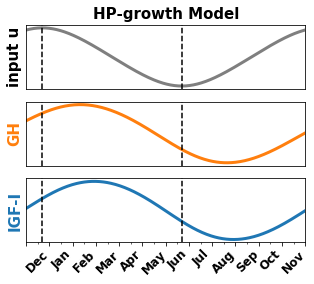

In [7]:
'''
HP-Growth Model
'''
############### equations ####################

def HPgrowth_fast(y,uapkr):
    ## timescale of minutes
    a1=1/(7); a2=1/(30); a3=1/(60*1.5); b1=a1   ; b2=a2    ; b3=a3  
    u,L,P,k,R  = uapkr
    [x1,x2,x3] = y 
    dy         = np.empty(3)
    dy[0] = u*b1/x3     -a1*x1
    dy[1] = b2*x1*P/x3  -a2*x2
    dy[2] = b3*x2**1*L     -a3*x3
    return dy

def GetNumericSS_HPgrowth(U,L,P,K,R):
    t      = np.linspace(0,60*24,100)
    sol    = odeint(lambda y,t:HPgrowth_fast(y,[U,L,P,K,R]),[1,1,1],t)
    res    = sol[-1,:]
    return res

slow_rate = np.log(2)/30
###############################################
sim_time  = np.linspace(-21,4*365-1-21,4*365)
liver     = np.zeros_like(sim_time); liver[0]  = 1
pituitary = np.zeros_like(sim_time); pituitary[0]= 1
K0 = 4; aP = slow_rate; aL = slow_rate/10; bP = slow_rate; bL = slow_rate/10

for i,t in enumerate(sim_time[:-1]):
    L = liver[i]; 
    P = pituitary[i]
    u = 2 - daylen(31.77,delta=23.44*np.cos(2*np.pi*((t)/365))*np.pi/180)/12
    
    x1,x2,x3  = GetNumericSS_HPgrowth(u,L,P,1,1)
    dL = L*(bA*x2-aL); liver[i+1]     = L + dL
    dP = P*(bP*x1-aP); pituitary[i+1] = P + dP ## x1 activate P
    
# seperate the fast and slow time scale, simulating again for the last year   
res = np.array([GetNumericSS_HPgrowth(1,L,P,K0,1) for L,P in zip(liver[-365:],pituitary[-365:])]); 
res = res/np.mean(res,axis=0);
theory_3_subplot(np.arange(365)/365*12,[2 - daylen(31.77,delta=23.44*np.cos(2*np.pi*((t)/365))*np.pi/180)/12 for t in sim_time[-365:]],
                 res[:,1],res[:,2],'GH','IGF-I',def_color[1],def_color[0],'HP-growth Model') 

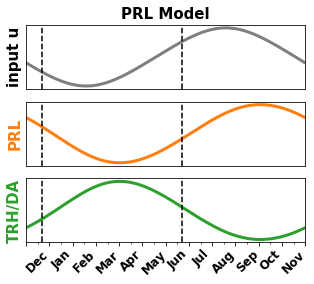

In [8]:
'''
Prolactin Model
'''
############### equations ####################

def HPP_fast(y,uapkr):
    ## timescale of minutes
    a1=1/(7); a2=1/(17); b1=a1   ; b2=a2
    u,A,P,k,R  = uapkr
    [x1,x2] = y 
    dy         = np.empty(2)
    dy[0] = u*b1/x2     -a1*x1
    dy[1] = b2*x1*P     -a2*x2
    return dy

def GetNumericSS_HPP(U,A,P,K,R):
    t      = np.linspace(0,60*24,100)
    sol    = odeint(lambda y,t:HPP_fast(y,[U,A,P,K,R]),[1,1],t)
    res    = sol[-1,:]
    return res

slow_rate = np.log(2)/10
###############################################
sim_time  = np.linspace(-21,4*365-1-21,4*365)
pituitary = np.zeros_like(sim_time); pituitary[0]= 1
aP = np.log(2)/20; bP = np.log(2)/20; 

for i,t in enumerate(sim_time[:-1]):
    P = pituitary[i]
    u = 2 - daylen(31.77,delta=23.44*np.cos(2*np.pi*((t-8*30)/365))*np.pi/180)/12
    x1,x2  = GetNumericSS_HPP(u,1,P,1,1)
    dP = P*(bP*x1-aP); pituitary[i+1] = P + dP ## x1 activate P
    
# seperate the fast and slow time scale, simulating again for the last year 
res = np.array([GetNumericSS_HPP(1,1,P,1,1) for P in pituitary[-365:]])
res = res/np.mean(res,axis=0)
theory_3_subplot(np.arange(365)/365*12,[2 - daylen(31.77,delta=23.44*np.cos(2*np.pi*((t-8*30)/365))*np.pi/180)/12 for t in sim_time[:365]],
                 res[:,1],res[:,0],'PRL','TRH/DA',def_color[1],def_color[2],'PRL Model') 

In [7]:
def HPA_graph_above_axe(ax):
    ax.imshow(mpimg.imread('../figures/ppt/HPX/HPA.PNG'))
    ax.axis('off')    
def HPT_graph_above_axe(ax):
    ax.imshow(mpimg.imread('../figures/ppt/HPX/HPT.PNG'))
    ax.axis('off')
def HPG_graph_above_axe(ax):
    ax.imshow(mpimg.imread('../figures/ppt/HPX/HPG.PNG'))
    ax.axis('off')
def HPL_graph_above_axe(ax):
    ax.imshow(mpimg.imread('../figures/ppt/HPX/HPL.PNG'))
    ax.axis('off')
def HPgrowth_graph_above_axe(ax):
    ax.imshow(mpimg.imread('../figures/ppt/HPX/HPgrowth.PNG'))
    ax.axis('off')

# All in one plot

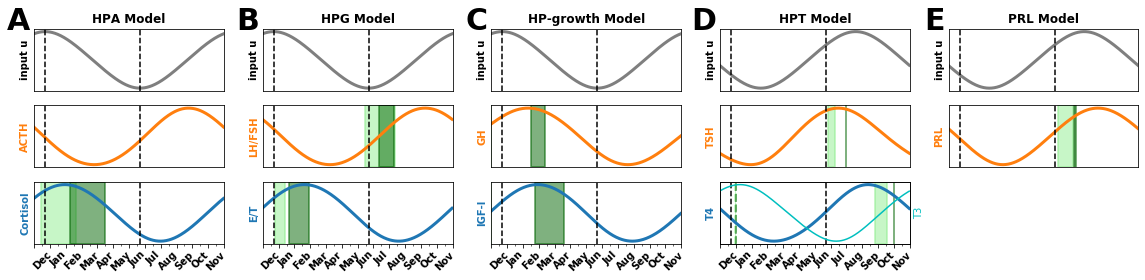

In [8]:
'''
-------------------HPA Model--------------------
'''
fig = plt.figure(figsize=(16,4))

ax1 = plt.subplot2grid((3, 5), (0, 0)); ax1.text(-0.02, 1.35, 'A', transform=ax1.transAxes,fontsize = 30, fontweight='bold', va='top', ha='right')
ax2 = plt.subplot2grid((3, 5), (1, 0))
ax3 = plt.subplot2grid((3, 5), (2, 0))
axes= [ax1,ax2,ax3]
def HPA_fast(y,uapkr):
    ## timescale of minutes
    a1=1/(7); a2=1/(30); a3=1/(60*1.5); b1=a1   ; b2=a2    ; b3=a3  
    u,A,P,k,R  = uapkr
    [x1,x2,x3] = y 
    dy         = np.empty(3)
    dy[0] = u*b1/(x3*(1+(x3/k)**3))-a1*x1
    dy[1] = b2*x1*P/(1+(x3/k)**3)  -a2*x2
    dy[2] = b3*x2*A                -a3*x3
    return dy

def GetNumericSS_HPA(U,A,P,K,R):
    t      = np.linspace(0,60*24,100)
    sol    = odeint(lambda y,t:HPA_fast(y,[U,A,P,K,R]),[1,1,1],t)
    res    = sol[-1,:]
    return res

slow_rate = np.log(2)/30; K0 = 4
sim_time  = np.linspace(-21,4*365-1-21,4*365)
adrenal   = np.zeros_like(sim_time); adrenal[0]  = 1
pituitary = np.zeros_like(sim_time); pituitary[0]= 1
K0 = 4; aP = slow_rate; aA = slow_rate; bP = slow_rate; bA = slow_rate

for i,t in enumerate(sim_time[:-1]):
    A = adrenal[i]; 
    P = pituitary[i]
    u = 2 - daylen(31.77,delta=23.44*np.cos(2*np.pi*((t)/365))*np.pi/180)/12
    
    x1,x2,x3  = GetNumericSS_HPA(u,A,P,K0,1)
    dA = A*(bA*x2-aA); adrenal[i+1]   = A + dA
    dP = P*(bP*x1-aP); pituitary[i+1] = P + dP ## x1 activate P
    
# seperate the fast and slow time scale, simulating again for the last year   
res = np.array([GetNumericSS_HPA(1,A,P,K0,1) for A,P in zip(adrenal[-365:],pituitary[-365:])]); 
res = res/np.mean(res,axis=0);
theory_3_subplot_big(axes,np.arange(365)/365*12,[2 - daylen(31.77,delta=23.44*np.cos(2*np.pi*((t)/365))*np.pi/180)/12 for t in sim_time[-365:]],
                 res[:,1],res[:,2],'ACTH','Cortisol',def_color[1],def_color[0],'HPA Model') 

HPA_phase_axspan(ax2,ax3)
'''
-------------------HPG Model--------------------
'''
ax1 = plt.subplot2grid((3, 5), (0, 1)); ax1.text(-0.02, 1.35, 'B', transform=ax1.transAxes,fontsize = 30, fontweight='bold', va='top', ha='right')
ax2 = plt.subplot2grid((3, 5), (1, 1))
ax3 = plt.subplot2grid((3, 5), (2, 1))
axes= [ax1,ax2,ax3]
def HPA_fast(y,uapkr):
    ## timescale of minutes
    a1=1/(7); a2=1/(30); a3=1/(60*1.5); b1=a1   ; b2=a2    ; b3=a3  
    u,A,P,k,R  = uapkr
    [x1,x2,x3] = y 
    dy         = np.empty(3)
    dy[0] = u*b1/x3    -a1*x1
    dy[1] = b2*x1*P/x3 -a2*x2
    dy[2] = b3*x2*A    -a3*x3
    return dy

def GetNumericSS_HPA(U,A,P,K,R):
    t      = np.linspace(0,60*24,100)
    sol    = odeint(lambda y,t:HPA_fast(y,[U,A,P,K,R]),[1,1,1],t)
    res    = sol[-1,:]
    return res

slow_rate = np.log(2)/30; K0 = 4
sim_time  = np.linspace(-21,4*365-1-21,4*365)
adrenal   = np.zeros_like(sim_time); adrenal[0]  = 1
pituitary = np.zeros_like(sim_time); pituitary[0]= 1
K0 = 4; aP = slow_rate; aA = slow_rate; bP = slow_rate; bA = slow_rate

for i,t in enumerate(sim_time[:-1]):
    A = adrenal[i]; 
    P = pituitary[i]
    u = 2 - daylen(31.77,delta=23.44*np.cos(2*np.pi*((t)/365))*np.pi/180)/12
    
    x1,x2,x3  = GetNumericSS_HPA(u,A,P,K0,1)
    dA = A*(bA*x2-aA); adrenal[i+1]   = A + dA
    dP = P*(bP*x1-aP); pituitary[i+1] = P + dP ## x1 activate P
    
# seperate the fast and slow time scale, simulating again for the last year   
res = np.array([GetNumericSS_HPA(1,A,P,K0,1) for A,P in zip(adrenal[-365:],pituitary[-365:])]); 
res = res/np.mean(res,axis=0);
theory_3_subplot_big(axes,np.arange(365)/365*12,[2 - daylen(31.77,delta=23.44*np.cos(2*np.pi*((t)/365))*np.pi/180)/12 for t in sim_time[-365:]],
                 res[:,1],res[:,2],'LH/FSH','E/T',def_color[1],def_color[0],'HPG Model') 
HPG_phase_axspan(ax2,ax3)

'''
-------------------HP-growth Model--------------------
'''
ax1 = plt.subplot2grid((3, 5), (0, 2)); ax1.text(-0.02, 1.35, 'C', transform=ax1.transAxes,fontsize = 30, fontweight='bold', va='top', ha='right')
ax2 = plt.subplot2grid((3, 5), (1, 2))
ax3 = plt.subplot2grid((3, 5), (2, 2))
axes= [ax1,ax2,ax3]
def HPgrowth_fast(y,uapkr):
    ## timescale of minutes
    a1=1/(7); a2=1/(30); a3=1/(60*1.5); b1=a1   ; b2=a2    ; b3=a3  
    u,L,P,k,R  = uapkr
    [x1,x2,x3] = y 
    dy         = np.empty(3)
    dy[0] = u*b1/x3     -a1*x1
    dy[1] = b2*x1*P/x3  -a2*x2
    dy[2] = b3*x2**1*L     -a3*x3
    return dy

def GetNumericSS_HPgrowth(U,L,P,K,R):
    t      = np.linspace(0,60*24,100)
    sol    = odeint(lambda y,t:HPgrowth_fast(y,[U,L,P,K,R]),[1,1,1],t)
    res    = sol[-1,:]
    return res

slow_rate = np.log(2)/30
sim_time  = np.linspace(-21,4*365-1-21,4*365)
liver     = np.zeros_like(sim_time); liver[0]  = 1
pituitary = np.zeros_like(sim_time); pituitary[0]= 1
K0 = 4; aP = slow_rate; aL = slow_rate/10; bP = slow_rate; bL = slow_rate/10

for i,t in enumerate(sim_time[:-1]):
    L = liver[i]; 
    P = pituitary[i]
    u = 2 - daylen(31.77,delta=23.44*np.cos(2*np.pi*((t)/365))*np.pi/180)/12
    
    x1,x2,x3  = GetNumericSS_HPgrowth(u,L,P,1,1)
    dL = L*(bA*x2-aL); liver[i+1]     = L + dL
    dP = P*(bP*x1-aP); pituitary[i+1] = P + dP ## x1 activate P
    
# seperate the fast and slow time scale, simulating again for the last year   
res = np.array([GetNumericSS_HPgrowth(1,L,P,K0,1) for L,P in zip(liver[-365:],pituitary[-365:])]); 
res = res/np.mean(res,axis=0);
theory_3_subplot_big(axes,np.arange(365)/365*12,[2 - daylen(31.77,delta=23.44*np.cos(2*np.pi*((t)/365))*np.pi/180)/12 for t in sim_time[-365:]],
                 res[:,1],res[:,2],'GH','IGF-I',def_color[1],def_color[0],'HP-growth Model') 

HPgrowth_phase_axspan(ax2,ax3)

'''
-------------------HPT Model--------------------
'''
ax1 = plt.subplot2grid((3, 5), (0, 3)); ax1.text(-0.02, 1.35, 'D', transform=ax1.transAxes,fontsize = 30, fontweight='bold', va='top', ha='right')
ax2 = plt.subplot2grid((3, 5), (1, 3))
ax3 = plt.subplot2grid((3, 5), (2, 3))
axes= [ax1,ax2,ax3]

'''
HPT Model
'''
def HPT_fast(y,uapkr):
    ## timescale of minutes
    a1=1/(7); a2=1/(60); a3=1/(60*24*7); b1=a1   ; b2=a2    ; b3=a3  
    u,A,P,k,R  = uapkr
    [x1,x2,x3] = y 
    dy         = np.empty(3)
    dy[0] = u*b1/x3     -a1*x1
    dy[1] = b2*x1*P/x3  -a2*x2
    dy[2] = b3*x2*A     -a3*x3
    return dy

def GetNumericSS_HPT(U,A,P,K,R):
    t      = np.linspace(0,60*24,100)
    sol    = odeint(lambda y,t:HPT_fast(y,[U,A,P,K,R]),[1,1,1],t)
    res    = sol[-1,:]
    return res

slow_rate = np.log(2)/30;
sim_time  = np.linspace(-21,4*365-1-21,4*365)
thyroid   = np.zeros_like(sim_time); thyroid[0]  = 1
pituitary = np.zeros_like(sim_time); pituitary[0]= 1
aP = slow_rate; aT = slow_rate; bP = slow_rate; bT = slow_rate
t3       = []
hormones = []
for i,t in enumerate(sim_time[:-1]):
    T = thyroid[i]; 
    P = pituitary[i]
    u = 2 - daylen(31.77,delta=23.44*np.cos(2*np.pi*((t-8*30)/365))*np.pi/180)/12
    ui= 2 - daylen(31.77,delta=23.44*np.cos(2*np.pi*((t-7*30)/365)+np.pi)*np.pi/180)/12

    x1,x2,x3  = GetNumericSS_HPT(u,T,P,1,1)
    dT = T*(bT*x2-aT); thyroid[i+1]   = T + dT
    dP = P*(bP/x3-aP); pituitary[i+1] = P + dP ## x1 activate P
    t3.append([x3*ui])
    hormones.append([x1,x2,x3])
    
res = np.array(hormones[-365:]); 
res = res/np.mean(res,axis=0);
theory_3_subplot_big(axes,np.arange(365)/365*12,[2 - daylen(31.77,delta=23.44*np.cos(2*np.pi*((t-8*30)/365))*np.pi/180)/12 for t in sim_time[-365:]],
                 res[:,1],res[:,2],'TSH','T4',def_color[1],def_color[0],'HPT Model') 
HPT_phase_axspan(ax2,ax3)

ax3b = ax3.twinx()
ax3b.plot(np.arange(365)/365*12,np.array(t3/np.mean(t3[-365:]))[-365:],c='c')
ax3b.set_yticks([])
ax3b.set_ylabel('T3',c='c')

'''
-------------------HP-PRL Model--------------------
'''
ax1 = plt.subplot2grid((3, 5), (0, 4));  ax1.text(-0.02, 1.35, 'E', transform=ax1.transAxes,fontsize = 30, fontweight='bold', va='top', ha='right')
ax2 = plt.subplot2grid((3, 5), (1, 4))
ax3 = plt.subplot2grid((3, 5), (2, 4))
axes= [ax1,ax2,ax3]

def HPP_fast(y,uapkr):
    ## timescale of minutes
    a1=1/(7); a2=1/(17); b1=a1   ; b2=a2
    u,A,P,k,R  = uapkr
    [x1,x2] = y 
    dy         = np.empty(2)
    dy[0] = u*b1/x2     -a1*x1
    dy[1] = b2*x1*P     -a2*x2
    return dy

def GetNumericSS_HPP(U,A,P,K,R):
    t      = np.linspace(0,60*24,100)
    sol    = odeint(lambda y,t:HPP_fast(y,[U,A,P,K,R]),[1,1],t)
    res    = sol[-1,:]
    return res

slow_rate = np.log(2)/10
sim_time  = np.linspace(-21,4*365-1-21,4*365)
pituitary = np.zeros_like(sim_time); pituitary[0]= 1
aP = slow_rate; bP = slow_rate; 

for i,t in enumerate(sim_time[:-1]):
    P = pituitary[i]
    u = 2 - daylen(31.77,delta=23.44*np.cos(2*np.pi*((t-8*30)/365))*np.pi/180)/12
    ui= 2 - daylen(31.77,delta=23.44*np.cos(2*np.pi*((t-7*30)/365)+np.pi)*np.pi/180)/12
    x1,x2  = GetNumericSS_HPP(u,1,P,1,1)
    dP = P*(bP*x1-aP); pituitary[i+1] = P + dP ## x1 activate P
    
# seperate the fast and slow time scale, simulating again for the last year 
res = np.array([GetNumericSS_HPP(1,1,P,1,1) for P in pituitary[-365:]])
res = res/np.mean(res,axis=0)
theory_3_subplot_big(axes,np.arange(365)/365*12,[2 - daylen(31.77,delta=23.44*np.cos(2*np.pi*((t-8*30)/365))*np.pi/180)/12 for t in sim_time[:365]],
                 res[:,1],res[:,0],'PRL','TRH/DA',def_color[1],def_color[2],'PRL Model')

HPL_phase_axspan(ax2,ax3)
plt.tight_layout()
plt.savefig('../figures/Seasonality11022020/SI_HPX_models_1102.pdf',bbox_inches='tight',dpi=600)
plt.show()

In [ ]:
'''
Seneitivity of HPA model to hormonal production and removal rate.
'''
summery = []
for p1 in [0.5,1,2]:
    for p2 in [0.5,1,2]:
        for p3 in [0.5,1,2]:    
            ############### equations ####################
            def HPA_fast(y,uapkr):
                ## timescale of minutes
                a1=p1*1/(7); a2=p2*1/(30); a3=p3*1/(60*1.5); b1=a1 ; b2=a2 ; b3=a3  
                u,A,P,k,R  = uapkr
                [x1,x2,x3] = y 
                dy         = np.empty(3)
                dy[0] = u*b1/(x3*(1+(x3/k)**3))-a1*x1
                dy[1] = b2*x1*P/(1+(x3/k)**3)  -a2*x2
                dy[2] = b3*x2*A                -a3*x3
                return dy

            def GetNumericSS_HPA(U,A,P,K,R):
                t      = np.linspace(0,60*24,100)
                sol    = odeint(lambda y,t:HPA_fast(y,[U,A,P,K,R]),[1,1,1],t)
                res    = sol[-1,:]
                return res

            slow_rate = np.log(2)/30; K0 = 4
            ###############################################
            sim_time  = np.linspace(-21,4*365-1-21,4*365)
            adrenal   = np.zeros_like(sim_time); adrenal[0]  = 1
            pituitary = np.zeros_like(sim_time); pituitary[0]= 1
            K0 = 4; aP = slow_rate; aA = slow_rate; bP = slow_rate; bA = slow_rate

            for i,t in enumerate(sim_time[:-1]):
                A = adrenal[i]; 
                P = pituitary[i]
                u = 2 - daylen(31.77,delta=23.44*np.cos(2*np.pi*((t)/365))*np.pi/180)/12

                x1,x2,x3  = GetNumericSS_HPA(u,A,P,K0,1)
                dA = A*(bA*x2-aA); adrenal[i+1]   = A + dA
                dP = P*(bP*x1-aP); pituitary[i+1] = P + dP ## x1 activate P

            # seperate the fast and slow time scale, simulating again for the last year   
            res = np.array([GetNumericSS_HPA(1,A,P,K0,1) for A,P in zip(adrenal[-365:],pituitary[-365:])]); 
            res = res/np.mean(res,axis=0);
            summery.append([p1,p2,p3,res[:,2].argmax()])
display(summery)

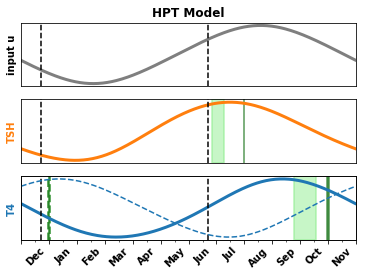

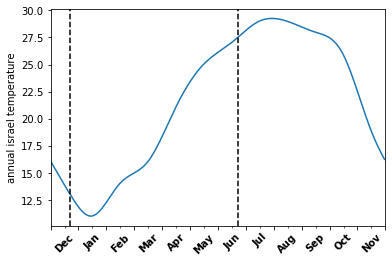

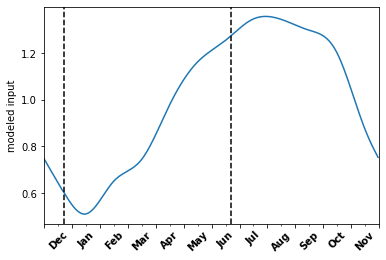

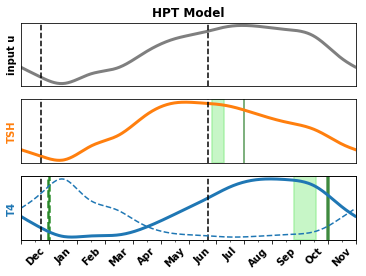

In [63]:
'''
Additional HPT Model, with israel temperature
'''
############### equations ####################
def HPT_fast(y,uapkr):
    ## timescale of minutes
    a1=1/(7); a2=1/(60); a3=1/(60*24*7); b1=a1   ; b2=a2    ; b3=a3  
    u,A,P,k,R  = uapkr
    [x1,x2,x3] = y 
    dy         = np.empty(3)
    dy[0] = u*b1/x3     -a1*x1
    dy[1] = b2*x1*P/x3  -a2*x2
    dy[2] = b3*x2*A     -a3*x3
    return dy

def GetNumericSS_HPT(U,A,P,K,R):
    t      = np.linspace(0,60*24,100)
    sol    = odeint(lambda y,t:HPT_fast(y,[U,A,P,K,R]),[1,1,1],t)
    res    = sol[-1,:]
    return res

slow_rate = np.log(2)/30;
###############################################
sim_time  = np.linspace(-21,4*365-1-21,4*365)
thyroid   = np.zeros_like(sim_time); thyroid[0]  = 1
pituitary = np.zeros_like(sim_time); pituitary[0]= 1
aP = slow_rate; aT = slow_rate; bP = slow_rate; bT = slow_rate
hormones = []
t3       = []
for i,t in enumerate(sim_time[:-1]):
    T = thyroid[i]; 
    P = pituitary[i]
    u = 2 - daylen(31.77,delta=23.44*np.cos(2*np.pi*((t-8*30)/365))*np.pi/180)/12
    ui= 2 - daylen(31.77,delta=23.44*np.cos(2*np.pi*((t-1*30)/365))*np.pi/180)/12

    x1,x2,x3  = GetNumericSS_HPT(u,T,P,1,1)
    dT = T*(bT*x2-aT); thyroid[i+1]   = T + dT
    dP = P*(bP/x3-aP); pituitary[i+1] = P + dP ## x1 activate P
    t3.append([x3*ui])
    hormones.append([x1,x2,x3])
    
res = np.array(hormones[-365:]); 
res = res/np.mean(res,axis=0);

ax1 = plt.subplot2grid((3, 1), (0, 0))
ax2 = plt.subplot2grid((3, 1), (1, 0))
ax3 = plt.subplot2grid((3, 1), (2, 0))
axes= [ax1,ax2,ax3]

theory_3_subplot_big(axes,np.arange(365)/365*12,[2 - daylen(31.77,delta=23.44*np.cos(2*np.pi*((t-8*30)/365))*np.pi/180)/12 for t in sim_time[-365:]],
                 res[:,1],res[:,2],'TSH','T4',def_color[1],def_color[0],'HPT Model') 
HPT_phase_axspan(ax2,ax3)

ax3b = ax3.twinx()
ax3b.plot(np.arange(365)/365*12,np.array(t3/np.mean(t3[-365:]))[-365:],'--',c=def_color[0])
ax3b.set_yticks([])
plt.show()

israel_temp = [14,11,14,16,21,25,27,29,29,28,26,19,14,11,14,16,21,25,27,29,29,28,26,19,14,11,14,16,21,25,27,29,29,28,26,19,14]
x = np.linspace(0, 36, num=37, endpoint=True)
f = interp1d(x, israel_temp,kind='cubic')
xnew = np.linspace(0, 36, num=365*3, endpoint=True)
ut = f(xnew) # two years, started at Dec 15
ut = np.roll(ut,-6) # two years, starts at Dec21
ut = ut[365:-365] # one year, starts at Dec0, no jerk in u

def daytemp(t):
    t= int(t)
    if t<0:
        t = t+365 
    if t >364:
        qun = t//365
    else:
        qun = 0 
    t2 = t-qun*365 
    return ut[t2]

sim_time  = np.linspace(-21,365-1-21,365)
ax3 = plt.subplot(111)
ax3.plot(np.arange(365)/365*12,[daytemp(int(t)) for t in sim_time])
ax3.axvline(x=0.7,ls='--',c='k'); ax3.axvline(x=6.7,ls='--',c='k')
ax3.set_xticks(np.arange(0,13,1))
ax3.set_xticklabels([])
ax3.set_xticks(np.arange(0,12,1)+0.5,minor=True)
ax3.set_xticklabels(month_names0[::1], rotation=45,fontsize=10,fontweight='bold',minor =True)
ax3.set_xlim([0,12])
ax3.set_ylabel('annual israel temperature')
plt.show()

yearly_mean = np.mean([daytemp(int(t)) for t in sim_time])
temp_input  = [daytemp(int(t)) for t in sim_time]/yearly_mean
sim_time    = np.linspace(-21,365-1-21,365)
ax3 = plt.subplot(111)
ax3.plot(np.arange(365)/365*12,temp_input)
ax3.axvline(x=0.7,ls='--',c='k'); ax3.axvline(x=6.7,ls='--',c='k')
ax3.set_xticks(np.arange(0,13,1))
ax3.set_xticklabels([])
ax3.set_xticks(np.arange(0,12,1)+0.5,minor=True)
ax3.set_xticklabels(month_names0[::1], rotation=45,fontsize=10,fontweight='bold',minor =True)
ax3.set_xlim([0,12])
ax3.set_ylabel('modeled input')
plt.show()

'''
HPT Model
'''
############### equations ####################
def HPT_fast(y,uapkr):
    ## timescale of minutes
    a1=1/(7); a2=1/(60); a3=1/(60*24*7); b1=a1   ; b2=a2    ; b3=a3  
    u,A,P,k,R  = uapkr
    [x1,x2,x3] = y 
    dy         = np.empty(3)
    dy[0] = u*b1/x3     -a1*x1
    dy[1] = b2*x1*P/x3  -a2*x2
    dy[2] = b3*x2*A     -a3*x3
    return dy

def GetNumericSS_HPT(U,A,P,K,R):
    t      = np.linspace(0,60*24,100)
    sol    = odeint(lambda y,t:HPT_fast(y,[U,A,P,K,R]),[1,1,1],t)
    res    = sol[-1,:]
    return res

slow_rate = np.log(2)/30;
###############################################
sim_time  = np.linspace(-21,4*365-1-21,4*365)
thyroid   = np.zeros_like(sim_time); thyroid[0]  = 1
pituitary = np.zeros_like(sim_time); pituitary[0]= 1
aP = slow_rate; aT = slow_rate; bP =slow_rate; bT = slow_rate
hormones = []
t3       = []
for i,t in enumerate(sim_time[:-1]):
    T = thyroid[i]; 
    P = pituitary[i]
    u = daytemp(t)/yearly_mean

    x1,x2,x3  = GetNumericSS_HPT(u,T,P,1,1)
    dT = T*(bT*x2-aT); thyroid[i+1]   = T + dT
    dP = P*(bP/x3-aP); pituitary[i+1] = P + dP ## x1 activate P
    t3.append([x3/u])
    hormones.append([x1,x2,x3])
    
res = np.array(hormones[-365:]); 
res = res/np.mean(res,axis=0);

ax1 = plt.subplot2grid((3, 1), (0, 0))
ax2 = plt.subplot2grid((3, 1), (1, 0))
ax3 = plt.subplot2grid((3, 1), (2, 0))
axes= [ax1,ax2,ax3]

theory_3_subplot_big(axes,np.arange(365)/365*12,[daytemp(t) for t in sim_time[-365:]],
                 res[:,1],res[:,2],'TSH','T4',def_color[1],def_color[0],'HPT Model') 
HPT_phase_axspan(ax2,ax3)

ax3b = ax3.twinx()
ax3b.plot(np.arange(365)/365*12,np.array(t3/np.mean(t3[-365:]))[-365:],'--',c=def_color[0])
ax3b.set_yticks([])
plt.show()

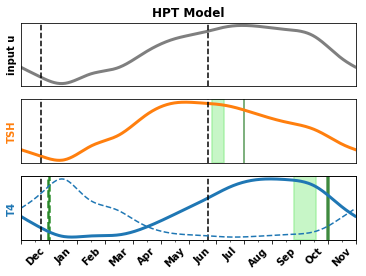

In [66]:
'''
HPT Model
'''
###############################################
sim_time  = np.linspace(-21,4*365-1-21,4*365)
thyroid   = np.zeros_like(sim_time); thyroid[0]  = 1
pituitary = np.zeros_like(sim_time); pituitary[0]= 1

aP = np.log(2)/30; aT = np.log(2)/30 
bP = np.log(2)/30; bT = np.log(2)/30

hormones = []
t3       = []
for i,t in enumerate(sim_time[:-1]):
    T = thyroid[i]; 
    P = pituitary[i]
    u = daytemp(t)/yearly_mean

    x1,x2,x3  = GetNumericSS_HPT(u,T,P,1,1)
    dT = T*(bT*x2-aT); thyroid[i+1]   = T + dT
    dP = P*(bP/x3-aP); pituitary[i+1] = P + dP ## x1 activate P
    t3.append([x3/u])
    hormones.append([x1,x2,x3])
    
res = np.array(hormones[-365:]); 
res = res/np.mean(res,axis=0);

ax1 = plt.subplot2grid((3, 1), (0, 0))
ax2 = plt.subplot2grid((3, 1), (1, 0))
ax3 = plt.subplot2grid((3, 1), (2, 0))
axes= [ax1,ax2,ax3]

theory_3_subplot_big(axes,np.arange(365)/365*12,[daytemp(t) for t in sim_time[-365:]],
                 res[:,1],res[:,2],'TSH','T4',def_color[1],def_color[0],'HPT Model') 
HPT_phase_axspan(ax2,ax3)

ax3b = ax3.twinx()
ax3b.plot(np.arange(365)/365*12,np.array(t3/np.mean(t3[-365:]))[-365:],'--',c=def_color[0])
ax3b.set_yticks([])
plt.show()

In [150]:
'''
Numeric parameter scan - may conatin bugs
'''
############### equations ####################
def HPA_fast(y,uapkr):
    ## timescale of minutes
    a1=1/(7); a2=1/(30); a3=1/(60*1.5); b1=a1   ; b2=a2    ; b3=a3  
    u,A,P,k,R  = uapkr
    [x1,x2,x3] = y 
    dy         = np.empty(3)
    dy[0] = u*b1/(x3*(1+(x3/k)**3))-a1*x1
    dy[1] = b2*x1*P/(1+(x3/k)**3)  -a2*x2
    dy[2] = b3*x2*A                -a3*x3
    return dy

def GetNumericSS_HPA(U,A,P,K,R):
    t      = np.linspace(0,60*24,100)
    sol    = odeint(lambda y,t:HPA_fast(y,[U,A,P,K,R]),[1,1,1],t)
    res    = sol[-1,:]
    return res
###############################################
K0  = 4
rPs = [np.log(2)/days for days in np.arange(1,101,1)]
rAs = [np.log(2)/days for days in np.arange(1,101,1)]
scan_res = []
for rateP in tqdm(rPs):
    for rateA in tqdm(rAs):
        sim_time  = np.linspace(-21,3*365-1-21,3*365)
        adrenal   = np.zeros_like(sim_time); adrenal[0]  = 1
        pituitary = np.zeros_like(sim_time); pituitary[0]= 1

        aP = rateP; aA = rateA;
        bP = rateP; bA = rateA

        for i,t in enumerate(sim_time[:-1]):
            A = adrenal[i]; 
            P = pituitary[i]
            u = 2 - daylen(31.77,delta=23.44*np.cos(2*np.pi*((t)/365))*np.pi/180)/12

            x1,x2,x3  = GetNumericSS_HPA(u,A,P,K0,1)
            dA = A*(bA*x2-aA); adrenal[i+1]   = A + dA
            dP = P*(bP*x1-aP); pituitary[i+1] = P + dP ## x1 activate P

        # seperate the fast and slow time scale, simulating again for the last year   
        res = np.array([GetNumericSS_HPA(1,A,P,K0,1) for A,P in zip(adrenal[-365:],pituitary[-365:])]); 
        res = res/np.mean(res,axis=0);

        acth = res[:,1].argmax();  cort = res[:,2].argmax()

        cort_peak = cort - 21
        acth_peak = acth - 21        
        scan_res.append([cort_peak/30,acth_peak/30,np.log(2)/rateP,np.log(2)/rateA])
scan_res = np.array(scan_res)

In [151]:
# pickle.dump(scan_res,open("parameter_scan_results_1601.pickle","wb"))

In [36]:
scan_res = pickle.load(open("parameter_scan_results_1601.pickle","rb"))
rPs = [np.log(2)/days for days in np.arange(1,101,1)]
rAs = [np.log(2)/days for days in np.arange(1,101,1)]

In [34]:
indices = [tup for tup in zip([int(x) for x in (scan_res[:,2]-1)],[int(y) for y in (scan_res[:,3]-1)])]
M       = np.zeros((len(rPs),len(rAs)))
for i,xy in enumerate(indices):
    M[xy[0],xy[1]] = scan_res[i,0]
    
M2       = np.zeros((len(rPs),len(rAs)))
for i,xy in enumerate(indices):
    M2[xy[0],xy[1]] = scan_res[i,1] 
    
M3       = np.zeros((len(rPs),len(rAs)))
for i,xy in enumerate(indices):
    ap    =1/scan_res[i,2]
    aa    = 1/scan_res[i,3]
    n_PP  = -1/2
    n_AP  = -1/2
    n_PA  =  1/2 
    n_AA  = -1/2
    det   = ap*aa*(n_PP*n_AA-n_AP*n_PA)
    trace = ap*n_PP+aa*n_AA
    w_0   = np.sqrt(det-(trace**2)/4)
    M3[xy[0],xy[1]] = (2*np.pi)/w_0    
M3[np.isnan(M3)] = 0   
M3 = M3/30

M4       = np.zeros((len(rPs),len(rAs)))
for i,xy in enumerate(indices):
    M4[xy[0],xy[1]] = scan_res[i,1] - scan_res[i,0] 

constrct1 = (M>=1) & (M<=4)
constrct2 = (M2>=4.5) & (M2<=8)
constrct3 = (M3>=10) & (M3<=14)
constrct4 = (M4>=6) & (M4<=7)
constrct_all = constrct1 & constrct2 & constrct3 

plt.figure(figsize=(6,6))
ax = plt.subplot(1,1,1)

ax.contourf(constrct3,levels =1,colors=['white','b'],alpha=0.3)     # resonance freq
ax.contourf(constrct1,levels =1,colors=['white','g'],alpha=0.3)     # cort february
ax.contourf(constrct2,levels =1,colors=['white','r'],alpha=0.3)     # acth june
# ax.contourf(constrct4,levels =1,colors=['white','purple'],alpha=0.2)# phase shift
ax.contour(constrct_all,levels =0,colors=['g'])# phase shift

ax.set_xticks(np.arange(0,100,10))
ax.set_yticks(np.arange(0,100,10))
ax.set_xticklabels(np.arange(0,100,10))
ax.set_yticklabels(np.arange(0,100,10))
ax.set_xlim([0,60])
ax.set_ylim([0,60])
ax.set_ylabel('P turnover')
ax.set_xlabel('A turnover')
ax.grid()

import matplotlib.patches as mpatches
resonance1y = mpatches.Patch(facecolor='b', label='1year resonance',alpha=0.4)
cort_phase  = mpatches.Patch(facecolor='g', label='cort phase',alpha=0.4)
acth_phase  = mpatches.Patch(facecolor='r', label='acth phase',alpha=0.4)
# phased6m    = mpatches.Patch(facecolor='purple', label='6months phasediff',alpha=0.4)
all_        = mpatches.Patch(facecolor='g', label='all',alpha=1)

ax.legend(handles=[resonance1y,cort_phase,acth_phase,all_],loc=5)
plt.tight_layout()
# plt.savefig('../figures/Seasonality06012020/turnover_parameter_scan_1501c.pdf',bbox_inches='tight',dpi=600)
plt.show()

NameError: name 'scan_res' is not defined